In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf


In [2]:
nombres = np.genfromtxt("../data/pmv.csv",delimiter=',',max_rows=1,dtype="U")
for i in enumerate(nombres):
    print(i)
    
nombres[0] = 'tiempo'
nombres[1] = "To"
nombres[2] = 'Tr'
nombres[3] = "Ti"
nombres[4] = 'Tbh'
nombres[5] = "m3"
nombres[6] = 'ach'
nombres[7] = "hr"
nombres[8] = 'pmv'
nombres[9] = "ppd"

(0, 'Date/Time')
(1, 'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)')
(2, 'D7:Zone Mean Radiant Temperature [C](TimeStep)')
(3, 'D7:Zone Mean Air Temperature [C](TimeStep)')
(4, 'D7:Zone Mean Air Dewpoint Temperature [C](TimeStep)')
(5, 'D7:AFN Zone Infiltration Volume [m3](TimeStep)')
(6, 'D7:AFN Zone Infiltration Air Change Rate [ach](TimeStep)')
(7, 'D7:Zone Air Relative Humidity [%](TimeStep)')
(8, 'D7 PEOPLE:Zone Thermal Comfort Fanger Model PMV [](TimeStep)')
(9, 'D7 PEOPLE:Zone Thermal Comfort Fanger Model PPD [%](TimeStep)')


In [3]:
pmv = pd.read_csv("../data/pmv.csv",delimiter=",",names=nombres,skiprows=1)
pmv = pmv[pmv.pmv>=0 ]
pmv.loc[(pmv.pmv>=0)|(pmv.pmv<=0.5),"target"] = 0
pmv.loc[(pmv.pmv>0.5),"target"] = 1
del pmv['m3']
del pmv['tiempo']
del pmv['pmv']
del pmv['ppd']
pmv.columns

Index(['To', 'Tr', 'Ti', 'Tbh', 'ach', 'hr', 'target'], dtype='object')

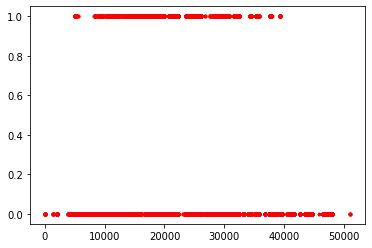

In [4]:
# pmv.target.plot()
fig, ax = plt.subplots()

ax.plot(pmv.target,"r.")

In [53]:
data   = np.array(pmv[[ 'Ti', 'hr']])
target = np.array(pmv.target,dtype=int)


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.33)
N, D = X_train.shape

In [56]:
from sklearn.preprocessing import StandardScaler
tf.keras.optimizers

<module 'tensorflow.keras.optimizers' from '/Library/Python/3.7/site-packages/tensorflow/keras/optimizers/__init__.py'>

In [57]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) 

In [72]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=100)

print("Train score:",model.evaluate(X_train,y_train))
print("Test score:",model.evaluate(X_test,y_test))

Epoch 1/100
217/217 [==============================] - 0s 1ms/step - loss: 1.2710 - accuracy: 0.1868 - val_loss: 1.1104 - val_accuracy: 0.1884
Epoch 2/100
217/217 [==============================] - 0s 766us/step - loss: 1.0638 - accuracy: 0.1902 - val_loss: 0.9459 - val_accuracy: 0.2062
Epoch 3/100
217/217 [==============================] - 0s 748us/step - loss: 0.9108 - accuracy: 0.2428 - val_loss: 0.8180 - val_accuracy: 0.4364
Epoch 4/100
217/217 [==============================] - 0s 815us/step - loss: 0.7899 - accuracy: 0.5130 - val_loss: 0.7216 - val_accuracy: 0.5671
Epoch 5/100
217/217 [==============================] - 0s 741us/step - loss: 0.6995 - accuracy: 0.5765 - val_loss: 0.6489 - val_accuracy: 0.6022
Epoch 6/100
217/217 [==============================] - 0s 766us/step - loss: 0.6316 - accuracy: 0.6445 - val_loss: 0.5939 - val_accuracy: 0.7330
Epoch 7/100
217/217 [==============================] - 0s 765us/step - loss: 0.5891 - accuracy: 0.7308 - val_loss: 0.5508 - val_accu

217/217 [==============================] - 0s 743us/step - loss: 0.1325 - accuracy: 0.9536 - val_loss: 0.1356 - val_accuracy: 0.9538
Epoch 58/100
217/217 [==============================] - 0s 747us/step - loss: 0.1348 - accuracy: 0.9488 - val_loss: 0.1347 - val_accuracy: 0.9535
Epoch 59/100
217/217 [==============================] - 0s 756us/step - loss: 0.1396 - accuracy: 0.9505 - val_loss: 0.1338 - val_accuracy: 0.9541
Epoch 60/100
217/217 [==============================] - 0s 755us/step - loss: 0.1304 - accuracy: 0.9535 - val_loss: 0.1330 - val_accuracy: 0.9541
Epoch 61/100
217/217 [==============================] - 0s 740us/step - loss: 0.1255 - accuracy: 0.9566 - val_loss: 0.1323 - val_accuracy: 0.9541
Epoch 62/100
217/217 [==============================] - 0s 761us/step - loss: 0.1256 - accuracy: 0.9567 - val_loss: 0.1316 - val_accuracy: 0.9541
Epoch 63/100
217/217 [==============================] - 0s 751us/step - loss: 0.1248 - accuracy: 0.9572 - val_loss: 0.1309 - val_accuracy

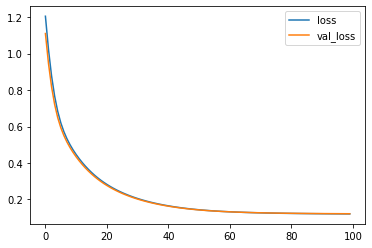

In [73]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

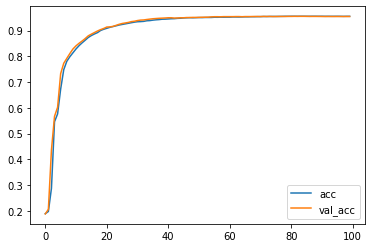

In [74]:
plt.plot(r.history["accuracy"],label="acc")
plt.plot(r.history["val_accuracy"],label="val_acc")
plt.legend()

In [75]:
x=np.array([[24.45912869, 97.63675648]])
x = scaler.transform(data)
x

array([[-1.85093679,  3.15488184],
       [-1.80323712,  3.14652638],
       [-1.78513546,  3.14162325],
       ...,
       [-0.38599103, -1.31094853],
       [-0.38928733, -1.39389632],
       [-0.46017693, -1.40857491]])

In [76]:
predicho = model.predict(x)

In [77]:
x

array([[-1.85093679,  3.15488184],
       [-1.80323712,  3.14652638],
       [-1.78513546,  3.14162325],
       ...,
       [-0.38599103, -1.31094853],
       [-0.38928733, -1.39389632],
       [-0.46017693, -1.40857491]])

In [78]:
predicho = np.round(predicho)

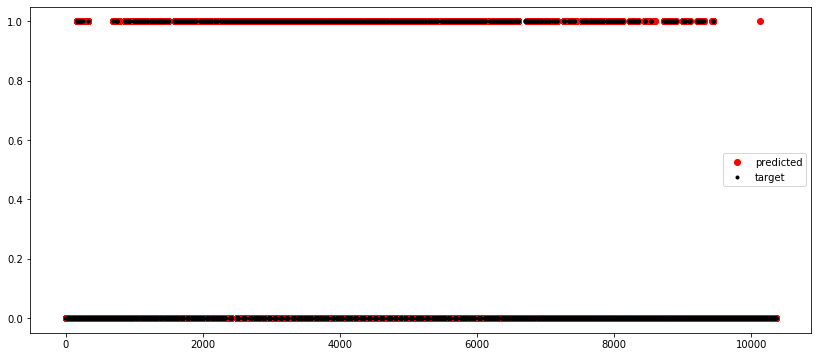

In [79]:
fig, ax  = plt.subplots(figsize=(14,6))

ax.plot(predicho,'ro',label="predicted")
ax.plot(target  ,'k.',label="target")
ax.legend()

In [68]:
target.shape

(10359,)

In [69]:
predicho.shape

(10359, 1)

In [ ]:
# X_train